In [1]:
# Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor



In [3]:
from lensutils import read_data as read
from lensutils import SingleLens as slf



In [4]:
data = read('./single/',t_range=(7940,8040))



Reading data:
['KMT-A31-OGL-2017-BLG-1572.dat', 'KMT-C31-OGL-2017-BLG-1572.dat', 'KMT-S31-OGL-2017-BLG-1572.dat', 'OGL-2017-BLG-1572.dat']


In [5]:
fitter = slf(data,[1.927,7984.64, 9.964])


Using KMT-A31- as reference.


 # Example with one one data source

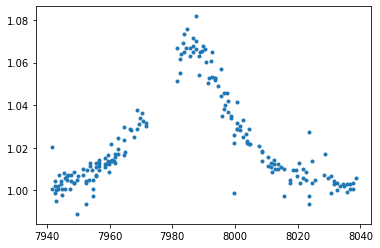

In [6]:
data_key = 'KMT-C31-'
t =  data[data_key][0]
obs = data[data_key][1]
err = data[data_key][2]
t, _, _ = fitter.data[data_key]
coeffs, _ = fitter.linear_fit(data_key,fitter.magnification(t))
fx = coeffs[0]+coeffs[1]*fitter.magnification(t)
obsl = (obs - coeffs[0])/coeffs[1] # This gives only magnification from baseline 1
err1 = err/coeffs[1]
plt.plot(t,obsl,'.')


<ErrorbarContainer object of 3 artists>

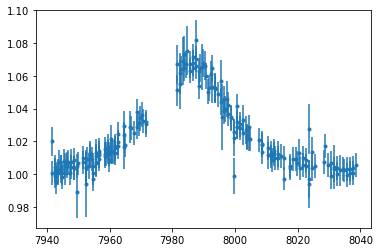

In [7]:
plt.errorbar(t,obsl,err1 , fmt = '.')



In [8]:
mag = fitter.magnification(data['KMT-C31-'][0])
chi = (mag-obsl)**2/err1**2



In [9]:
X = np.hstack((mag.reshape(len(mag),1),obsl.reshape(len(obsl),1),chi.reshape(len(chi),1)))



In [10]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20,metric='chebyshev', contamination=0.1,)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).



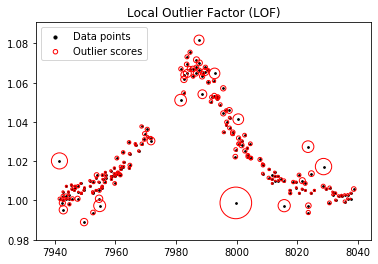

In [11]:
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(t, X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(t, X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
#plt.scatter(X[:, 0], X[:, 1], y_pred,marker='+', edgecolors='r',
#            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()



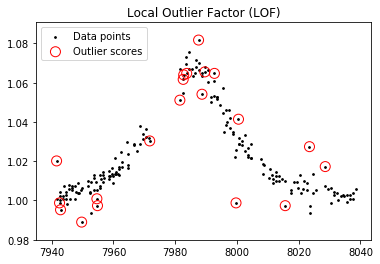

In [12]:
plt.title("Local Outlier Factor (LOF)")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],marker='+', edgecolors='r',
#           facecolors='none', label='Outlier scores')
plt.scatter(t, X[:, 1], color='k', s=3., label='Data points')
plt.scatter(t[y_pred!=1], X[y_pred!=1, 1], s=100, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()


 The following plots is form the view of the linear relation from the data and the model.

In [13]:
mag = fitter.magnification(data['KMT-C31-'][0])



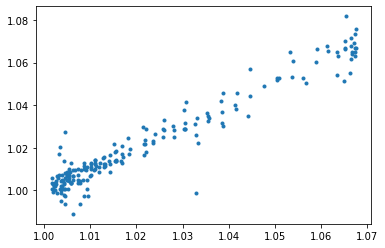

In [14]:
plt.plot(mag,obsl,'.')



In [15]:
Y = np.hstack((mag.reshape(len(mag),1),obsl.reshape(len(obsl),1)))



In [16]:
# fit the model for outlier detection (default)
clf2 = LocalOutlierFactor(n_neighbors=20,metric='chebyshev', contamination=0.1,)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).



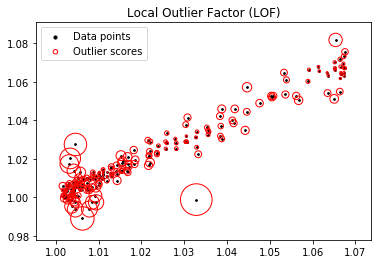

In [17]:
y_pred = clf2.fit_predict(Y)
X_scores = clf2.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
#plt.scatter(X[:, 0], X[:, 1], y_pred,marker='+', edgecolors='r',
#            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()



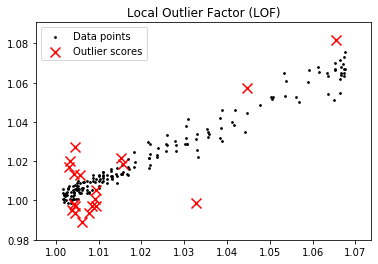

In [18]:
plt.title("Local Outlier Factor (LOF)")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],marker='+', edgecolors='r',
#           facecolors='none', label='Outlier scores')
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(X[y_pred != 1, 0], X[y_pred != 1, 1], s=100,marker='x', c='r' ,label='Outlier scores')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()



 #The Following uses all the datasets for the single example

In [19]:
t_vec = []
obs_vc = []
err_vec = []
for data_key in data.keys():
    print(data_key)
    t, _, err = fitter.data[data_key]
    obs = data[data_key][1]
    coeffs, _ = fitter.linear_fit(data_key,fitter.magnification(t))
    obsl = (obs - coeffs[0])/coeffs[1]
    err1 = err/coeffs[1]
    t_vec = np.append(t_vec,t)
    obs_vc = np.append(obs_vc,obsl)
    err_vec = np.append(err_vec,err1)



KMT-A31-
KMT-C31-
KMT-S31-
OGLE


In [20]:
obs_vc = obs_vc[t_vec.argsort()]
err_vec = err_vec[t_vec.argsort()]
t_vec = np.sort(t_vec)



<ErrorbarContainer object of 3 artists>

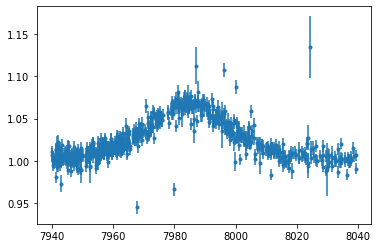

In [21]:
plt.errorbar(t_vec,obs_vc,err_vec,fmt='.')



In [22]:
magl = fitter.magnification(t_vec)
chi2 = (magl-obs_vc)**2/err_vec**2



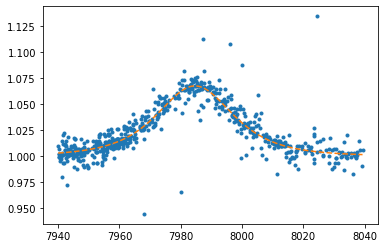

In [23]:
plt.plot(t_vec,obs_vc,'.')
plt.plot(t_vec,magl,'--')



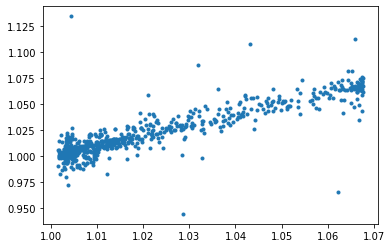

In [24]:
plt.plot(magl,obs_vc,'.')



In [25]:
Z = np.hstack((magl.reshape(len(magl),1),obs_vc.reshape(len(obs_vc),1),chi2.reshape(len(chi2),1)))



In [26]:
# fit the model for outlier detection (default)
clf2 = LocalOutlierFactor(n_neighbors=20,metric='chebyshev', contamination=0.01,)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).



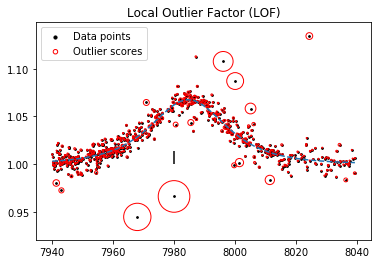

In [27]:
y_pred = clf2.fit_predict(Z)
X_scores = clf2.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(t_vec, Z[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(t_vec, Z[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
#plt.scatter(X[:, 0], X[:, 1], y_pred,marker='+', edgecolors='r',
#            facecolors='none', label='Outlier scores')
plt.plot(t_vec,magl,'--')
#plt.vlines(t_vec[X_scores==X_scores.max()], 1 , 1.05)
plt.vlines(t_vec[X_scores==X_scores.min()], 1 , 1.01367504)

plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()




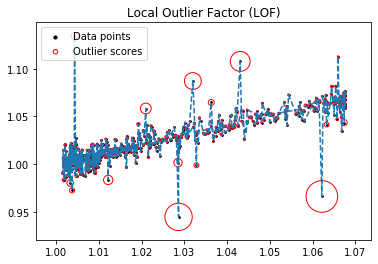

In [28]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(Z[:, 0], Z[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Z[:, 0], Z[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
#plt.scatter(X[:, 0], X[:, 1], y_pred,marker='+', edgecolors='r',
#            facecolors='none', label='Outlier scores')
plt.plot(magl,obs_vc,'--')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()



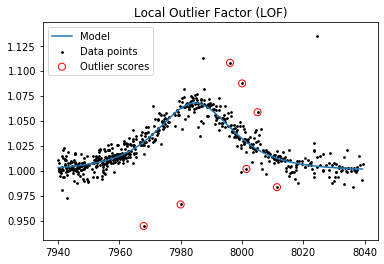

In [29]:
plt.title("Local Outlier Factor (LOF)")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],marker='+', edgecolors='r',
#           facecolors='none', label='Outlier scores')
plt.scatter(t_vec, Z[:, 1], color='k', s=3., label='Data points')
plt.scatter(t_vec[y_pred!=1], Z[y_pred!=1, 1], s=50,marker='o',edgecolors='r',facecolors='none' ,label='Outlier scores')
plt.plot(t_vec,magl, label='Model')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()



 This is the firs binary example, extreme case.

In [30]:
bindata = read('./bin1/',t_range=(7800,7950),max_uncertainty=1)



Reading data:
['OGL-2017-BLG-0812.dat']


In [31]:
binfitter = slf(bindata,[4.366,7884.99, 6.197])



Using OGLE as reference.


OGLE


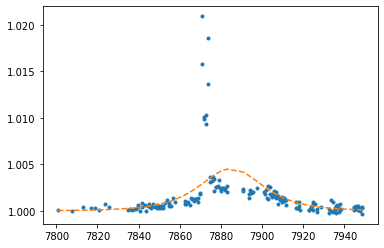

In [32]:
t_vec = []
obs_vc = []
err_vec = []
for data_key in bindata.keys():
    print(data_key)
    t, _, err = binfitter.data[data_key]
    obs = bindata[data_key][1]
    coeffs, _ = binfitter.linear_fit(data_key,binfitter.magnification(t))
    obsl = (obs - coeffs[0])/coeffs[1]
    err1 = err/coeffs[1]
    t_vec = np.append(t_vec,t)
    obs_vc = np.append(obs_vc,obsl)
    err_vec = np.append(err_vec,err1)


obs_vc = obs_vc[t_vec.argsort()]
err_vec = err_vec[t_vec.argsort()]
t_vec = np.sort(t_vec)
magl = binfitter.magnification(t_vec)
chi2 = (magl-obs_vc)**2/err_vec**2
plt.plot(t_vec,obs_vc,'.')
plt.plot(t_vec,magl,'--')



In [33]:
Z = np.hstack((magl.reshape(len(magl),1),obs_vc.reshape(len(obs_vc),1),chi2.reshape(len(chi2),1)))



In [34]:
# fit the model for outlier detection (default)
clf3 = LocalOutlierFactor(n_neighbors=20,metric='chebyshev', contamination=0.1,)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).



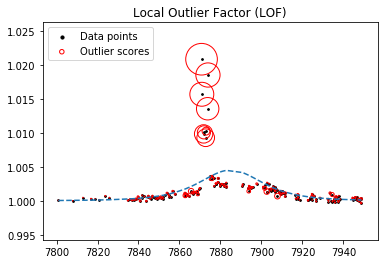

In [35]:
y_pred = clf2.fit_predict(Z)
X_scores = clf2.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(t_vec, Z[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(t_vec, Z[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
#plt.scatter(X[:, 0], X[:, 1], y_pred,marker='+', edgecolors='r',
#            facecolors='none', label='Outlier scores')
plt.plot(t_vec,magl,'--')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()



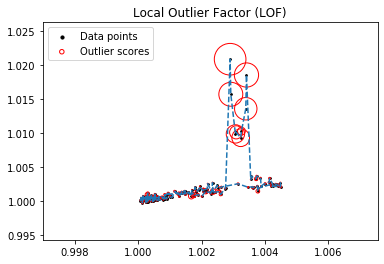

In [36]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(Z[:, 0], Z[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Z[:, 0], Z[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
#plt.scatter(X[:, 0], X[:, 1], y_pred,marker='+', edgecolors='r',
#            facecolors='none', label='Outlier scores')
plt.plot(magl,obs_vc,'--')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()


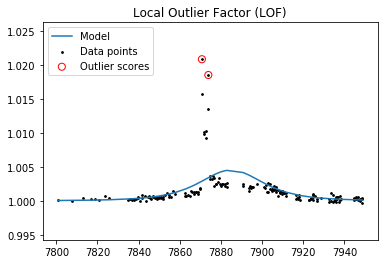

In [37]:
plt.title("Local Outlier Factor (LOF)")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],marker='+', edgecolors='r',
#           facecolors='none', label='Outlier scores')
plt.scatter(t_vec, Z[:, 1], color='k', s=3., label='Data points')
plt.scatter(t_vec[y_pred!=1], Z[y_pred!=1, 1], s=50,marker='o',edgecolors='r',facecolors='none' ,label='Outlier scores')
plt.plot(t_vec,magl, label='Model')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()


 Second example of anomalous fit. This case is very close to a good fit.

In [38]:
bindata2 = read('./bin2/',t_range=(7875,8025),max_uncertainty=1)



Reading data:
['KMT-A11-OGL-2017-BLG-1170.dat', 'KMT-C11-OGL-2017-BLG-1170.dat', 'KMT-CV-OGL-2017-BLG-1170.dat', 'KMT-S11-OGL-2017-BLG-1170.dat', 'OGL-2017-BLG-1170.dat']


In [39]:
binfitter2 = slf(bindata2,[0.27,7947.29, 20.33])



Using KMT-A11- as reference.


KMT-A11-
KMT-C11-
KMT-CV-O
KMT-S11-
OGLE


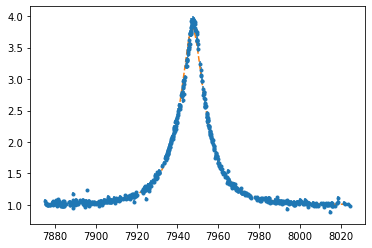

In [40]:
t_vec = []
obs_vc = []
err_vec = []
for data_key in bindata2.keys():
    print(data_key)
    t, _, err = binfitter2.data[data_key]
    obs = bindata2[data_key][1]
    coeffs, _ = binfitter2.linear_fit(data_key,binfitter2.magnification(t))
    obsl = (obs - coeffs[0])/coeffs[1]
    err1 = err/coeffs[1]
    t_vec = np.append(t_vec,t)
    obs_vc = np.append(obs_vc,obsl)
    err_vec = np.append(err_vec,err1)
obs_vc = obs_vc[t_vec.argsort()]
err_vec = err_vec[t_vec.argsort()]
t_vec = np.sort(t_vec)
magl = binfitter2.magnification(t_vec)
chi2 = (magl-obs_vc)**2/err_vec**2
plt.errorbar(t_vec,obs_vc,err_vec, fmt='.')
plt.plot(t_vec,magl,'--')



In [41]:
Z = np.hstack((magl.reshape(len(magl),1),obs_vc.reshape(len(obs_vc),1),chi2.reshape(len(chi2),1)))



In [42]:
# fit the model for outlier detection (default)
clf4 = LocalOutlierFactor(n_neighbors=20,metric='chebyshev', contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).



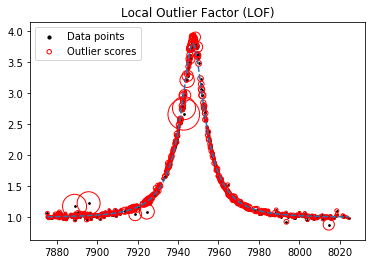

In [43]:
y_pred = clf4.fit_predict(Z)
X_scores = clf4.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(t_vec, Z[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(t_vec, Z[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
#plt.scatter(X[:, 0], X[:, 1], y_pred,marker='+', edgecolors='r',
#            facecolors='none', label='Outlier scores')
plt.plot(t_vec,magl,'--')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()



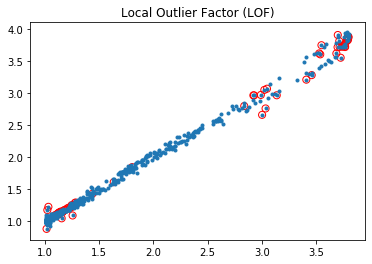

In [44]:
plt.title("Local Outlier Factor (LOF)")
#plt.scatter(Z[:, 0], Z[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Z[y_pred!=1, 0], Z[y_pred!=1, 1], s=50, edgecolors='r',
            facecolors='none', label='Outlier scores')
#plt.scatter(X[:, 0], X[:, 1], y_pred,marker='+', edgecolors='r',
#            facecolors='none', label='Outlier scores')
plt.errorbar(magl,obs_vc,fmt='.')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
#legend = plt.legend(loc='upper left')
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()



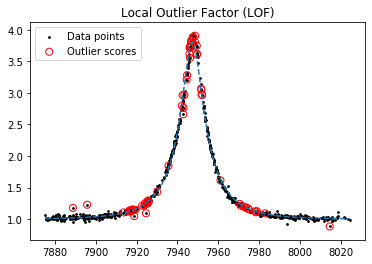

In [45]:
plt.title("Local Outlier Factor (LOF)")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],marker='+', edgecolors='r',
#           facecolors='none', label='Outlier scores')
plt.scatter(t_vec, Z[:, 1], color='k', s=3., label='Data points')
plt.scatter(t_vec[y_pred!=1], Z[y_pred!=1, 1], s=50,marker='o',edgecolors='r',facecolors='none' ,label='Outlier scores')
plt.plot(t_vec,magl,'--')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

